In [3]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

2022-04-21 14:10:26.167385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 14:10:26.167409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
train_ds = keras.utils.image_dataset_from_directory(
  "/home/irrational/Documents/celeba/training/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(218, 178),
  batch_size=100)

Found 141768 files belonging to 3 classes.
Using 113415 files for training.


2022-04-21 14:13:33.292123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 14:13:33.292164: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 14:13:33.292196: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (irrational-IdeaPad-3-15IIL05): /proc/driver/nvidia/version does not exist
2022-04-21 14:13:33.736952: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
data_dir = "/home/irrational/Documents/celeba/training/"
img_height = 218
img_width = 178
batch_size = 100
val_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 141768 files belonging to 3 classes.
Using 28353 files for validation.


In [7]:
print(train_ds.class_names)

['Big_Nose', 'Male', 'Wearing_Hat']


2022-04-21 14:19:51.155483: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 46564800 exceeds 10% of free system memory.


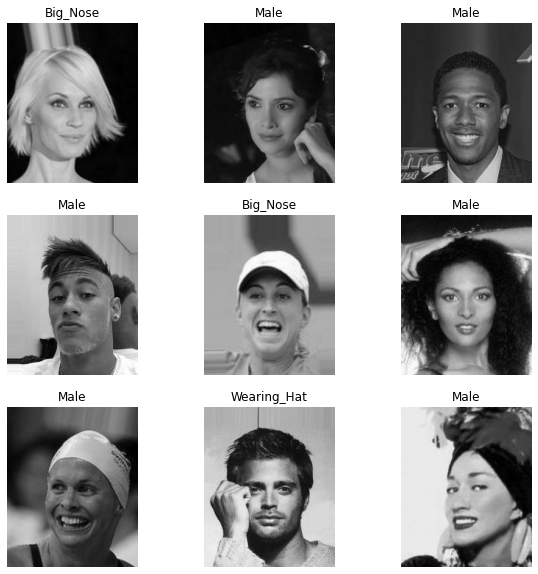

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")
